In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [6]:
dataset = "data_all_res copy.xlsx"
df = pd.read_excel(dataset)

In [ ]:

df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y  %I.%M.%S %p')
df['doy_date'] = df['Time'].dt.dayofyear

meter_cols = [f"r{i}" for i in range(1, 13)]

meter_daily = df.groupby('doy_date')[meter_cols].sum().T



Filtered months: ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Shape after filtering: (12, 12)


c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

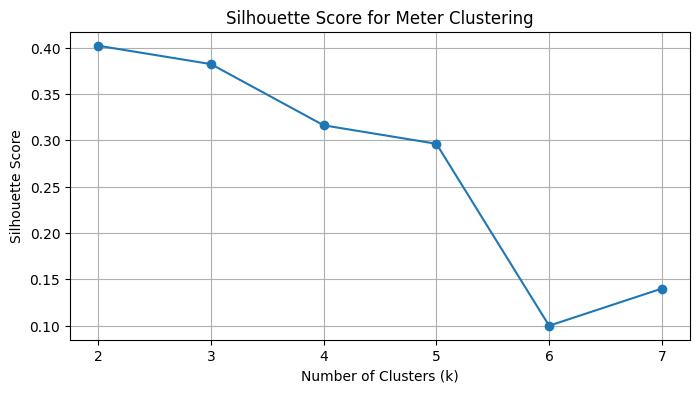

In [12]:
# Normalize month_name column
df['month_name'] = df['month_name'].str.strip().str.capitalize()


# Group by month_name and sum
monthly_data = df.groupby('month_name')[meter_cols].sum()

# Define calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Filter and order only months that exist in the data
existing_months = [m for m in month_order if m in monthly_data.index]
monthly_data = monthly_data.loc[existing_months]

print("Filtered months:", existing_months)
print("Shape after filtering:", monthly_data.shape)

# Transpose if you want to cluster meters (features)
monthly_data_T = monthly_data.T  # shape (12 meters, N months)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(monthly_data_T)

# KMeans
sil_scores = []
k_range = range(2, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score for Meter Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


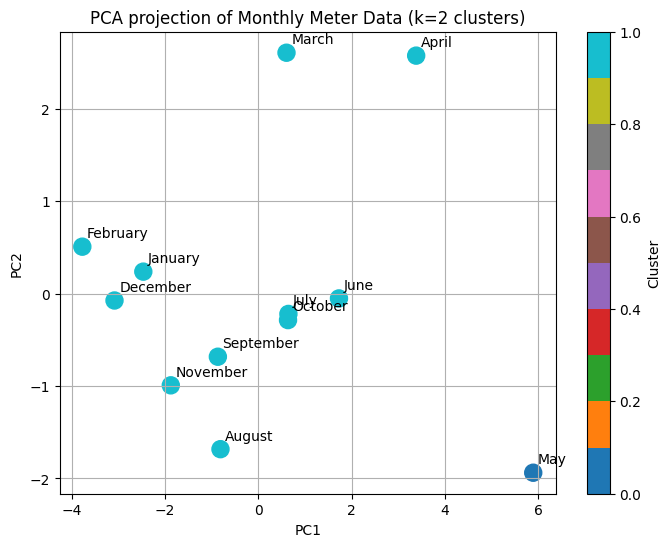

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

existing_months = [m for m in month_order if m in monthly_data.index]
monthly_data = monthly_data.loc[existing_months]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(monthly_data)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plot the PCA projection colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=150)

for i, month in enumerate(monthly_data.index):
    plt.annotate(month, (X_pca[i, 0]+0.1, X_pca[i, 1]+0.1))

plt.title(f'PCA projection of Monthly Meter Data (k={k} clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


NameError: name 'best_k' is not defined

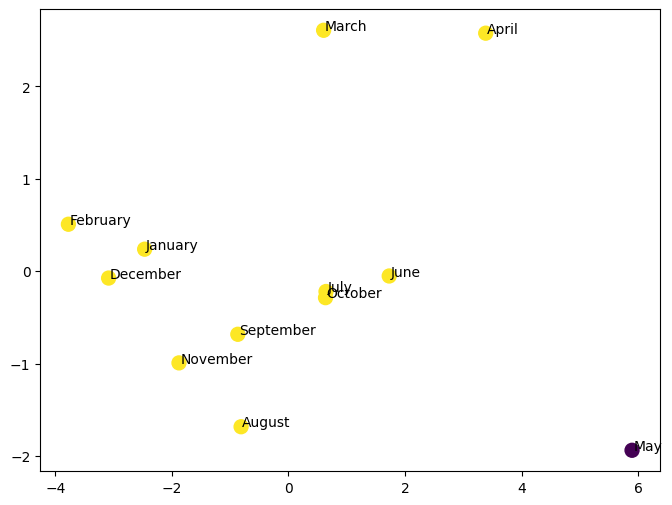

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=100)
for i, name in enumerate(monthly_data.index):
    plt.text(X_pca[i, 0]+0.02, X_pca[i, 1], name)
plt.title(f'Monthly Clusters (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [11]:
print(monthly_data.loc[['July', 'October', 'June']])


                  r1        r2        r3        r4        r5        r6  \
month_name                                                               
July        169.1798  156.7784  183.2112  222.7414  255.9834  218.6054   
October     166.3412  190.9829  156.5367  175.0162  261.7366  332.6185   
June        131.6246  206.7316  176.5165  208.8237  192.3505  215.8765   

                  r7        r8        r9       r10       r11       r12  
month_name                                                              
July        273.2052  348.5547  323.9746  324.0622  677.7272  484.5825  
October     267.3135  363.9401  310.1922  287.9996  520.9044  395.6192  
June        278.2228  334.4861  375.2992  467.1555  789.5537  709.0380  


In [ ]:

if 'cluster' in monthly_data.columns:
    data_for_distance = monthly_data.drop('cluster', axis=1)
else:
    data_for_distance = monthly_data


In [13]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

scaler = StandardScaler()
X_scaled = scaler.fit_transform(monthly_data.loc[['July', 'October', 'June']])

distances_scaled = pd.DataFrame(
    squareform(pdist(X_scaled)),
    index=['July', 'October', 'June'],
    columns=['July', 'October', 'June']
)
print(distances_scaled)


             July   October      June
July     0.000000  4.967886  5.370805
October  4.967886  0.000000  7.380688
June     5.370805  7.380688  0.000000


Silhouette Score for k=2: 0.402
Silhouette Score for k=3: 0.382
Silhouette Score for k=4: 0.316
Silhouette Score for k=5: 0.296


c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

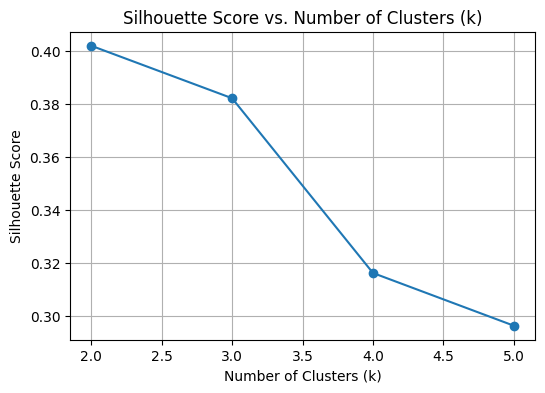

c:\ProgramData\anaconda3\envs\respier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster assignments:
   meter  cluster
0     r1        0
1     r2        0
2     r3        0
3     r4        0
4     r5        0
5     r6        0
6     r7        0
7     r8        0
8     r9        0
9    r10        0
10   r11        1
11   r12        1


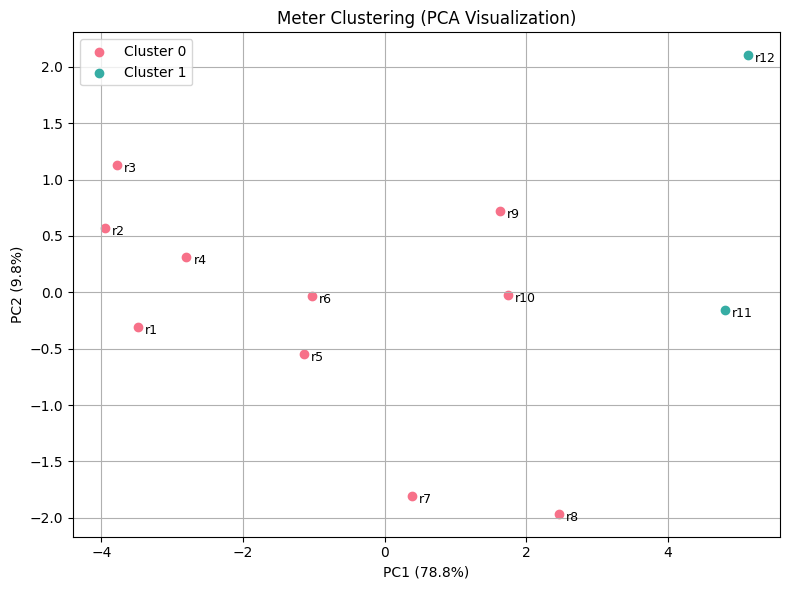

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

X_meters = monthly_data.T


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_meters)

sil_scores = []
K = range(2, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")


plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = K[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

meter_clusters = pd.DataFrame({
    'meter': X_meters.index,
    'cluster': clusters
})
print("\nCluster assignments:")
print(meter_clusters.sort_values(by='cluster'))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
palette = sns.color_palette("husl", optimal_k)
for cluster_id in range(optimal_k):
    plt.scatter(X_pca[clusters == cluster_id, 0],
                X_pca[clusters == cluster_id, 1],
                label=f'Cluster {cluster_id}',
                color=palette[cluster_id])

for i, meter in enumerate(X_meters.index):
    plt.annotate(meter, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5, -5), fontsize=9)

plt.title('Meter Clustering (PCA Visualization)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
